In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras.utils as image

from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


img = image.load_img("COVID-19_Radiography_Database/COVID/COVID-1.png")

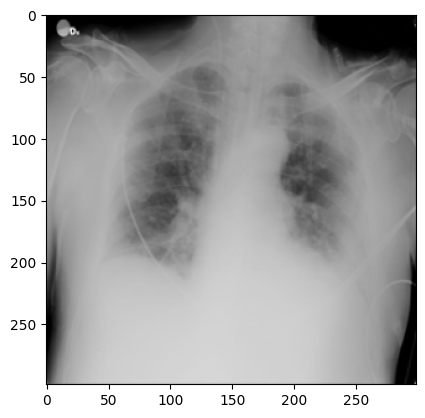

In [3]:
plt.imshow(img)
plt.show()

In [4]:
imagePaths = []
for dirname, _, filenames in os.walk('COVID-19_Radiography_Database'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [5]:
Data = []
Target = []
resize = 150

cat = {'Normal': 'Normal', 'COVID': 'Covid-19'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

100%|██████████| 4000/4000 [02:18<00:00, 28.90it/s]


In [6]:
size = []
for file in imagePaths:
    image = plt.imread(file)
    size.append(image.shape)
print(pd.Series(size).value_counts())

(299, 299)    4000
Name: count, dtype: int64


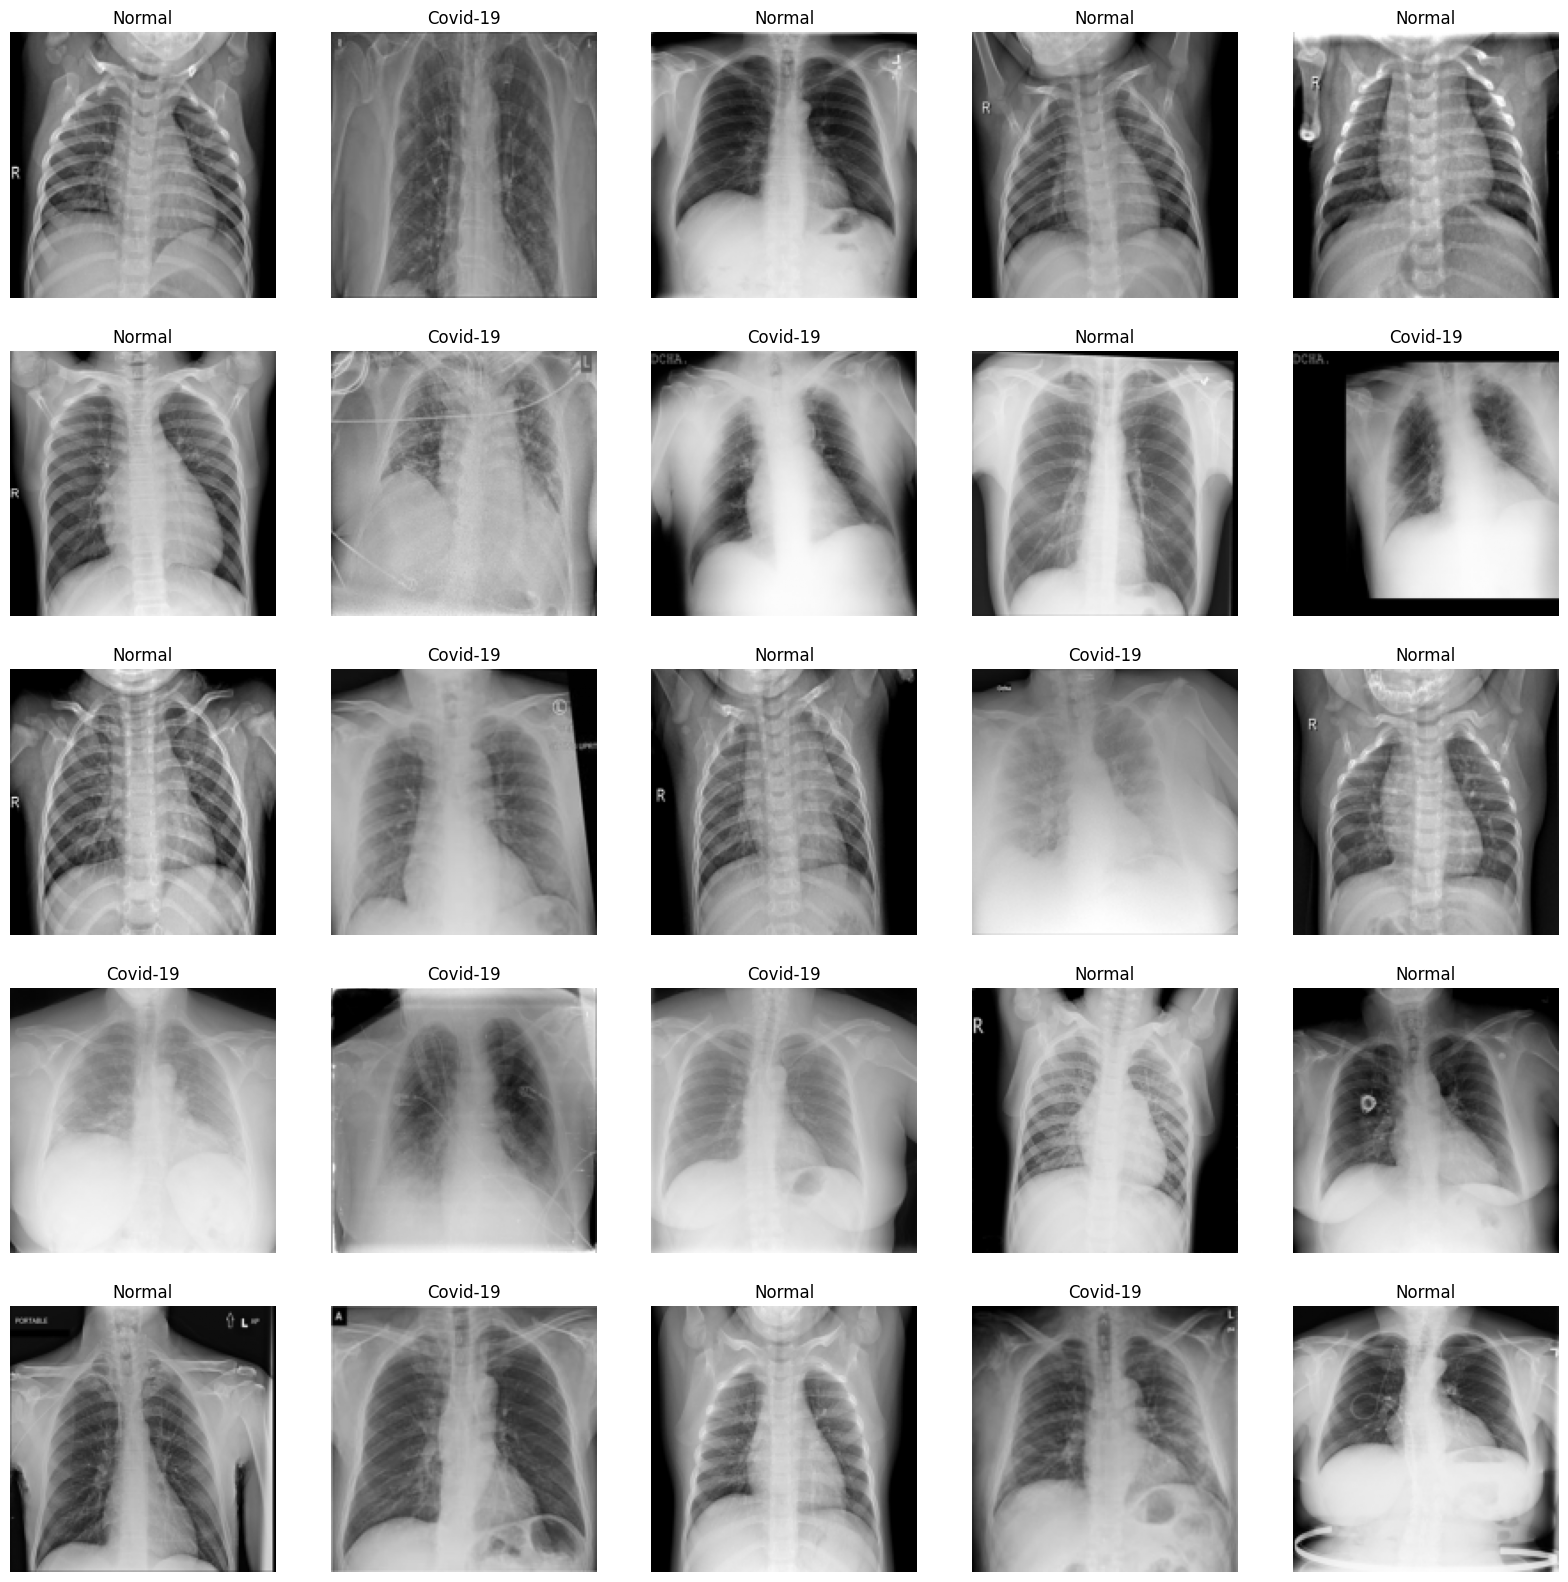

In [7]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) :
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')
plt.show()

In [8]:
le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal']
[1. 0.]


In [9]:
Data

[array([[[0.30980392, 0.30980392, 0.30980392],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.2       , 0.2       , 0.2       ]],
 
        [[0.01176471, 0.01176471, 0.01176471],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.04313725, 0.04313725, 0.04313725]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.01960784, 0.01960784, 0.01960784],
         [0.09411765, 0.09411765, 0.09411765]],
 
        ...,
 
        [[0.19607843, 0.19607843, 0.19607843],
         [0.26666667, 0.26666667, 0.26666

In [10]:
(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 2)
(800, 2)


In [11]:
trainX[0]

array([[[0.25490196, 0.25490196, 0.25490196],
        [0.22352941, 0.22352941, 0.22352941],
        [0.22745098, 0.22745098, 0.22745098],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.19215686, 0.19215686, 0.19215686],
        [0.24705882, 0.24705882, 0.24705882],
        [0.18431373, 0.18431373, 0.18431373],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.07843137, 0.07843137, 0.07843137],
        [0.14901961, 0.14901961, 0.14901961],
        [0.23921569, 0

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(150,150,3), kernel_initializer='he_normal',))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 128)      0

In [14]:
epochs = 6

ThisModel = model.fit(trainX, trainY, epochs=epochs, batch_size=8, verbose=1)


modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

Epoch 1/6
400/400 [==============================] - 105s 258ms/step - loss: 0.4257 - accuracy: 0.8416
Epoch 2/6
400/400 [==============================] - 100s 250ms/step - loss: 0.2636 - accuracy: 0.8975
Epoch 3/6
400/400 [==============================] - 99s 247ms/step - loss: 0.1999 - accuracy: 0.9228
Epoch 4/6
400/400 [==============================] - 101s 252ms/step - loss: 0.1579 - accuracy: 0.9388
Epoch 5/6
400/400 [==============================] - 101s 252ms/step - loss: 0.1411 - accuracy: 0.9534
Epoch 6/6
400/400 [==============================] - 100s 250ms/step - loss: 0.1200 - accuracy: 0.9547
Test Loss is 0.1743427813053131
Test Accuracy is 0.9462500214576721


In [15]:
modelAccuracy

0.9462500214576721

In [16]:
class_names = ['COVID-19','Normal']

y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

25/25 [==============================] - 4s 159ms/step
COVID-19


In [17]:
# classification report on train
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))


80/80 [==============================] - 16s 193ms/step
              precision    recall  f1-score   support

    Covid-19    0.94468   0.99250   0.96800      1600
      Normal    0.99210   0.94188   0.96634      1600

    accuracy                        0.96719      3200
   macro avg    0.96839   0.96719   0.96717      3200
weighted avg    0.96839   0.96719   0.96717      3200



In [18]:
# classification report on test
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))


20/20 [==============================] - 4s 197ms/step
              precision    recall  f1-score   support

    Covid-19    0.91608   0.98250   0.94813       400
      Normal    0.98113   0.91000   0.94423       400

    accuracy                        0.94625       800
   macro avg    0.94861   0.94625   0.94618       800
weighted avg    0.94861   0.94625   0.94618       800



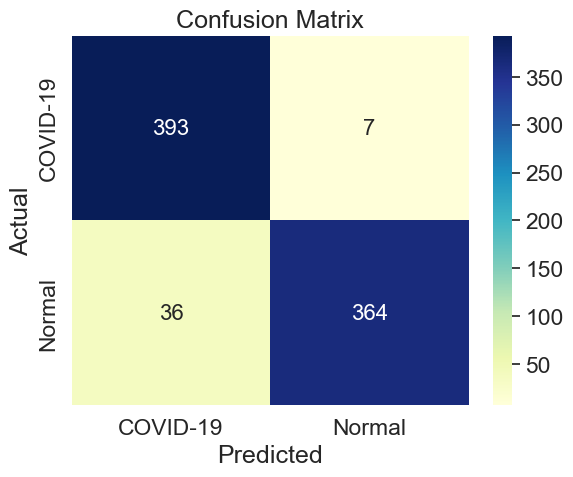

In [22]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

In [21]:
model.save('CNN_Covid19_Xray_V1.h5')